In [6]:
import os
import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
fake = pd.read_csv('Fake.csv')  
true = pd.read_csv('True.csv')

In [8]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
# check different subject and how many
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [11]:
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [12]:
# create a category for fake / true
fake['category']=1 
true['category']=0

In [13]:
fake

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [14]:
true

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [15]:
df= pd.concat([fake,true]).reset_index(drop=True) #drop掉一行index 不然會有兩行

In [16]:
df.head(15)

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


/home/alissa/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='category', ylabel='count'>

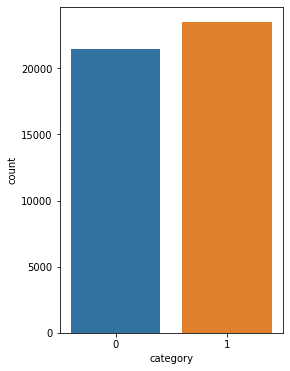

In [17]:
# fake :1, true:0
plt.figure(figsize=(4,6))
sns.countplot(df["category"])

#plt.plot((1,2,3),(4,3,-1))
#plt.xlabel(u'横坐标',  fontproperties=myfont) # 这一段
#plt.ylabel(u'纵坐标',  fontproperties=myfont) # 这一段
#plt.show() # 有了%matplotlib inline 就可以省掉plt.show()了

/home/alissa/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

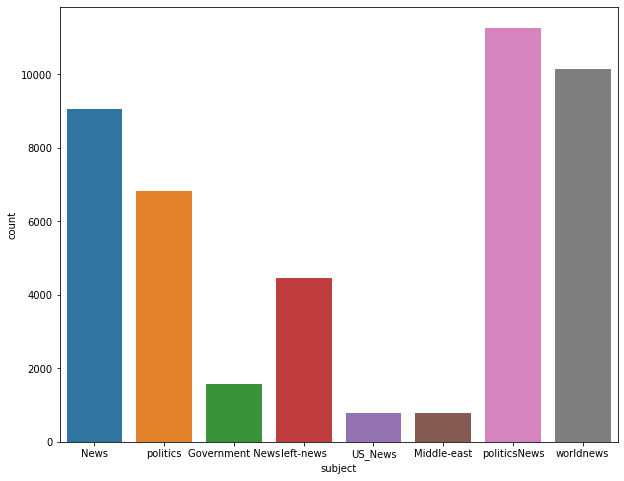

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df["subject"])

# data cleaning


In [19]:
df = df[["text","category"]]

# number of missing value
df.isna().sum()

text        0
category    0
dtype: int64

In [20]:
# index, label and review of document
a=[]
for i, text in df['text'].iteritems():  #counting
    if text.isspace():
        a.append(i)
len(a) # number of space

631

In [21]:
a

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [22]:
df['text'][11041] #有空白字符

' '

In [23]:
# drop space
df.drop(a, inplace=True)

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import spacy

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/alissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
nlp = spacy.load("en_core_web_sm")
lemma = WordNetLemmatizer()

/home/alissa/.local/lib/python3.6/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.1.0) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [27]:
#stopwords
list =nlp.Defaults.stop_words
print(len(list))

326


In [28]:
#stopwords
list1 =set(stopwords.words('english'))
print(len(list1))

179


In [29]:
# combining the stopwords
stopwords =set((set(list)|set(list1)))
print(len(stopwords))  #重複123個

382


In [30]:
def clean_text(text):
    string=""
    
    text = text.lower()#lower words
    
    #simplify text and remove the charachters
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"could't","could not",text)

    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
        
    for word in text.split():
        if word not in stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [31]:
# before
df["text"][0]  

#Donald Trump just couldn't wish

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

# Wrong meaning  how to solve?

In [32]:
#after
clean_text(df["text"][0])

#donald trump wish

'donald trump wish american happy new year leave instead shout enemy hater dishonest fake news medium reality star job country rapidly grows stronger smarter want wish friend supporter enemy hater dishonest fake news medium happy healthy new year president angry pant tweeted 2018 great year america country rapidly grows stronger smarter want wish friend supporter enemy hater dishonest fake news medium happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizen happy new year bishop talbert swan talbertswan december 31 2017no like calvin calvinstowell december 31 2017your impeachment 2018 great year america accept regaining control congress miranda yaver mirandayaver december 31 2017do hear talk include people hate wonder hate alan sandoval alansandoval13 december 31 2017who us wor

In [33]:
df["text"]= df["text"].apply(clean_text)
df["text"]

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed milwaukee sheriff david clarke...
3        christmas day donald trump announced work foll...
4        pope francis annual christmas day message rebu...
                               ...                        
44893    brussels reuters nato ally tuesday welcomed pr...
44894    london reuters lexisnexis provider legal regul...
44895    minsk reuters shadow disused soviet era factor...
44896    moscow reuters vatican secretary state cardina...
44897    jakarta reuters indonesia buy 11 sukhoi fighte...
Name: text, Length: 44267, dtype: object

In [34]:
# POS
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/alissa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alissa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
tokens = nltk.word_tokenize(text)
tagged_sent = nltk.pos_tag(tokens)
print(tagged_sent)

[('JAKARTA', 'NNP'), ('(', '('), ('Reuters', 'NNP'), (')', ')'), ('-', ':'), ('Indonesia', 'NN'), ('will', 'MD'), ('buy', 'VB'), ('11', 'CD'), ('Sukhoi', 'NNP'), ('fighter', 'NN'), ('jets', 'NNS'), ('worth', 'JJ'), ('$', '$'), ('1.14', 'CD'), ('billion', 'CD'), ('from', 'IN'), ('Russia', 'NNP'), ('in', 'IN'), ('exchange', 'NN'), ('for', 'IN'), ('cash', 'NN'), ('and', 'CC'), ('Indonesian', 'JJ'), ('commodities', 'NNS'), (',', ','), ('two', 'CD'), ('cabinet', 'NN'), ('ministers', 'NNS'), ('said', 'VBD'), ('on', 'IN'), ('Tuesday', 'NNP'), ('.', '.'), ('The', 'DT'), ('Southeast', 'NNP'), ('Asian', 'JJ'), ('country', 'NN'), ('has', 'VBZ'), ('pledged', 'VBN'), ('to', 'TO'), ('ship', 'VB'), ('up', 'RP'), ('to', 'TO'), ('$', '$'), ('570', 'CD'), ('million', 'CD'), ('worth', 'NN'), ('of', 'IN'), ('commodities', 'NNS'), ('in', 'IN'), ('addition', 'NN'), ('to', 'TO'), ('cash', 'NN'), ('to', 'TO'), ('pay', 'VB'), ('for', 'IN'), ('the', 'DT'), ('Suhkoi', 'NNP'), ('SU-35', 'NNP'), ('fighter', 'NN'),

In [36]:
# Word cloud
from wordcloud import WordCloud

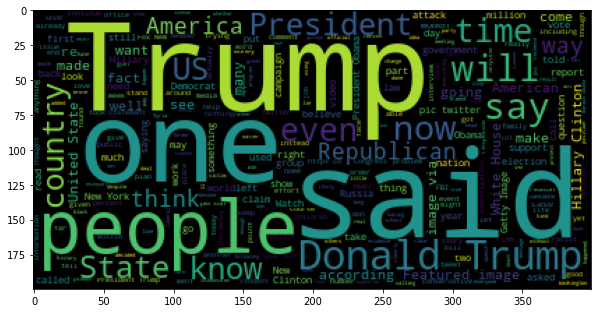

In [37]:
#True News
# 繪圖就要matplotlib
plt.figure(figsize = (10,20))

#使用 generate() function 就可以將文字自動統計、製作文字雲
Wc = WordCloud(max_words = 300).generate(" ".join(fake.text))
#plt.axis("off")
#plt.imshow(Wc , interpolation = 'bilinear')
plt.imshow(Wc)

In [38]:
# save img
Wc.to_file('WordCloud.png')

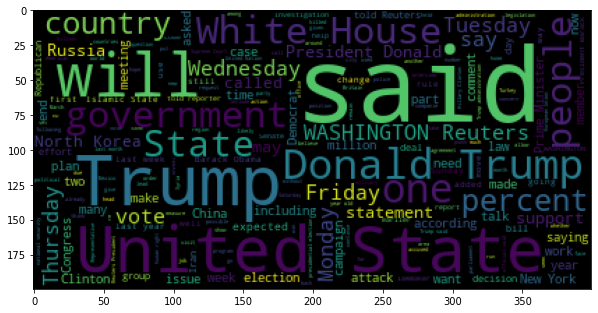

In [39]:
# Fake news
plt.figure(figsize = (10,20))

text = ' '.join(true.text) 
Wc = WordCloud().generate(text)
plt.imshow(Wc)

# Feature-Extraction & Model building¶

https://www.youtube.com/watch?v=RUan2toMSbE&list=PLtCJhQPz4XPUPUyy4xe2XfL6Hx-Y3Neqb&index=6&ab_channel=DataScienceNovice

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


In [41]:
#split dataset
X=df["text"] #feature
y=df["category"] #answer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
#TFIDF

vectorizer=TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
print(X_train_tfidf)

  (0, 59699)	0.02067258272507404
  (0, 49177)	0.08983334225483153
  (0, 42550)	0.02198157637155513
  (0, 32767)	0.02371912535971655
  (0, 91207)	0.056046563189366766
  (0, 12210)	0.0333235118146661
  (0, 14294)	0.029819616866487632
  (0, 79719)	0.0444255101069889
  (0, 74483)	0.037534734393435576
  (0, 62359)	0.04110612494298306
  (0, 84930)	0.017384376568579614
  (0, 79137)	0.06080317319535717
  (0, 81410)	0.07762267731427692
  (0, 34712)	0.055674333173748994
  (0, 79817)	0.035583211665657276
  (0, 11432)	0.04261036846230052
  (0, 27724)	0.03330432197509782
  (0, 84641)	0.03190692442353478
  (0, 64591)	0.040035170574447033
  (0, 51177)	0.026592569147903755
  (0, 63117)	0.05779300000534279
  (0, 62537)	0.03455335298377875
  (0, 77391)	0.0510183735695602
  (0, 8101)	0.03735833576291709
  (0, 79883)	0.05901171269642306
  :	:
  (29657, 43678)	0.05352735991865717
  (29657, 61277)	0.20267527840182187
  (29657, 93905)	0.019851782206071884
  (29657, 46077)	0.03391079215397205
  (29657, 50258)

In [48]:
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC()

In [51]:
t_clf = Pipeline([("tfidf", TfidfVectorizer()),("clf",LinearSVC())])
t_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [53]:
predict =t_clf.predict(X_test)

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

# from sklearn import metrics  
# metrics.classification_report(本來切出來的答案, 預測的結果)  印出表格

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       0.99      0.99      0.99      7562

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [55]:
print(metrics.accuracy_score(y_test,predict))


0.9932918064206996


In [56]:
print(metrics.confusion_matrix(y_test,predict))

# 47  missing classify values
# 51  missing classify values

[[7000   47]
 [  51 7511]]
